# IFT 3700 - Devoir 1
- OLIVIER DOMINIQUE (P0941078)
- HANIFA MALLEK (P1005515)
- VIVIANNE NGUYEN DONG (P0922428)
- MAUDE SABOURIN (P1141140)



## Rappel - Notion de distance
Même si la distance euclidienne est une des distances les plus utilisées pour les algorithmes, elle devient moins intéressante dans certaines situations clées. Plusieurs articles parlent, entre autres, d’un problème avec les grandes dimensions (connue comme la ‘curse of dimensionanility’). Ce projet proposera donc d’adapter la notion de distance à une notion de similarité.

Rappelons premièrement les propriétés d’une distance à proprement dit :
- Présence de l’inégalité du triangle
- Non-négativité
- Symétrie
- Distinguabilité


## Description - Notre notion de similarité
La performance des systèmes pour reconnaître l’écriture repose souvent sur deux facteurs : l’extraction des composantes à partir de l’image (provenant de la base de données MNIST) et le classement de celle-ci par la suite. Dans le cadre de ce cours, plusieurs techniques ont été introduites. Entre autres, il a été vu qu’il est possible d’utiliser PCA afin de réduire les dimensions de l’image d’abord, puis appliquer KNN avec la notion de distance euclidienne pour la classification de l’image par la suite. Lors de ce travail, il est demandé de proposer une nouvelle notion de similarité originale et de comparer l’efficacité de celle-ci avec la distance euclidienne.

Tout d’abord, nous pensions pouvoir utiliser des distances connues (similarité du cosinus utilisé avec JPEG, distance des tangentes, ou encore les gradients). Mais après quelques tests, les résultats ne furent pas très fructueux. Avec le peu d’expérience de l’équipe, la modification de ces algorithmes n’était pas dans la sphère du faisable. 

Ensuite, nous avons voulu utiliser les concepts de base des chiffres arabes : soit pouvoir reconnaître les courbes et les lignes. En effet, chaque chiffre se définit en fonction d’un certain nombre de courbes, de cercles et/ou de lignes droites. L’idée semblait intéressante et simple, mais nos faibles connaissances en mathématique nous ont encore une fois mis des barrières. Nous avons essayé de modéliser une façon de reconnaître les différents éléments des chiffres (prendre des points et trouver l’équation de deuxième degré, comparer les pentes à un tableau de pente pré-définie, faire une projection orthogonale dans un autre espace, etc.). Bref, nous semblions nous éloigner du but du cours sans être capable de concrètement produire quelque chose. Une autre idée a été d’utiliser les statistiques des coordonnées les plus représentées pour chaque chiffre. Ainsi, nous commençons par normaliser les chiffres pour les mettre en 0 et 1 plutôt qu’une valeur entre 0 et 255. Ensuite, nous mettons dans dix matrices différentes la somme de toutes les cases des matrices pour chaque chiffre.

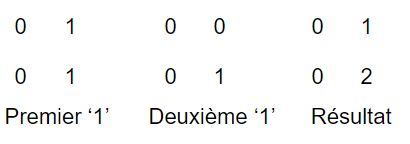

Cette façon simple nous permet de voir où se trouve les points les plus pertinents afin de reconnaître un chiffre en particulier. Par la suite, une fois que nous avons une matrice globale pour chaque chiffre, nous la divisons par la moyenne pour normaliser les chiffres qu’elle contient. On remarque par exemple que les coordonnées présentes presque partout ont une valeur d’environ 1000 (10^3) alors que les valeurs extrêmes ou rares auront une petite valeur.

Ensuite, lorsqu’un nouveau chiffre arrive dans le système, on compare le positionnement de ses 1 et 0 avec notre matrice. Un poids est attribué en fonction de la largeur du nombre. Ainsi, une valeur plus grande sera considéré comme un discriminant important pour décider si la nouvelle image est un nombre en particulier. De plus, nous considérons que notre équipe a une connaissance de base en écriture de nombres de façon calligraphique. Donc, nous avons de façon manuelle noter des coordonnées plus importantes que d’autres pour certains chiffres. Afin de tenir compte de la translation dans notre distance, nous appliquons la logique suivante :

1. Copier la matrice M en matrice M’
2. Pour tout i, Si M’[i][i] ne contient que des 0, supprimer la ligne et la colonne
3. Ramener ensuite la matrice M’ dans la dimension initiale M

En définitive, si on a fait une translation de notre chiffre vers la droite (par exemple), on va pouvoir se débarrasser de la portion vide à gauche. Puis, on va ramener le chiffre au centre lorsque l’on ramène la nouvelle matrice dans la dimension initiale. 

Tout ceci n’étant pas très concluant, nous avons opté pour une notion de similarité qui implique un traitement préalable des données. Ce traitement transforme les données d’abord puis utilise quand même la distance euclidienne pour les algorithmes suivants : k-médoïde, partition binaire, PCoA, Isomap et KNN. Dans un premier temps, nous allons expliquer en détail comment la transformation des données se fait. Puis, nous allons analyser la différence en termes de performance des différents algorithmes précisés lorsqu’on utilise seulement la notion euclidienne versus lorsqu’on utilise la distance euclidienne sur les données transformées.

Tel que mentionné plus haut, notre notion de similarité implique d’abord une transformation des données. Pour ce faire, nous allons utiliser la notion de traitement par centroïde. Dans un premier temps, nous allons chercher toutes les coordonnées (xi, yi) des pixels noirs de notre image. Nous faisons ensuite une moyenne sur ces coordonnées selon l’équation suivante :

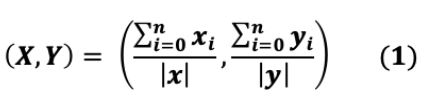

(X,Y) sont les coordonnées du centroïde de notre image de départ.

La deuxième étape consiste quant à elle à subdiviser ensuite l’image en n parties distinctes (prenons n=4 par exemple). On considère chacune des 4 sous-parties comme des images différentes maintenant et on réapplique la formule (1) sur chacune des sous-images afin d’obtenir leur centroïde. On obtient ainsi 4 paires de coordonnées : (X1, Y1), (X2, Y2), (X3, Y3) et (X4, Y4).

 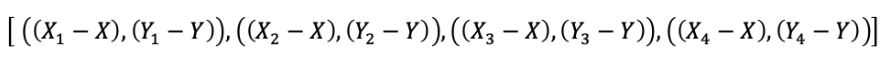

Finalement, la dernière étape implique la création d’un vecteur de n composantes afin de garder la distance entre chaque nouvelle paire de coordonnées obtenue pour les sous-images par rapport à la paire de coordonnées de l’image de départ.

L’avantage de procéder ainsi avec des sous-sections est que cela permet d’éliminer les variations de pixels au niveau de l’image et ainsi de garder une forme plus globale des chiffres. De plus, faire la différence entre les coordonnées des n centroïdes (des sous-images) et les coordonnées du centroïde de l’image initial permet d’éliminer les effets de translation étant donné qu’on ne considère toujours que les pixels noirs.


## Initialisations
### Importation des modules

In [7]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
#from pyclustering.cluster.kmedoids import kmedoids
#from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
import scipy.fftpack as fftpack
import scipy

import matplotlib.pyplot as plt
import matplotlib.image as img 
import time
%matplotlib inline

### Fonction Utile

In [2]:
def printImage(x, width=28, height=28):
    plt.imshow(x.reshape((height, width)), cmap='gray')


## Définition des listes de données MNIST


In [3]:
f = lambda x : 1 if x > 128 else 0
normalize = np.vectorize(f)

mnist_train = np.loadtxt("mnist_train.csv", delimiter=",", skiprows=1)
mnist_train[:, 1:] = normalize(mnist_train[:,1:])

mnist_test = np.loadtxt("mnist_test.csv", delimiter=",", skiprows=1)
mnist_test[:, 1:] = normalize(mnist_test[:,1:])



In [4]:
n_train_data = mnist_train.shape[0]

n_test_data = mnist_test.shape[0]

ndim = mnist_train.shape[1] - 1
img_dim = int(ndim ** (1./2.))

## Traitement par centroïde

Pour ce traitement, on commence par calculer le centroïde de l'image en calculant la moyenne des coordonnées (x,y) des pixels noirs de l'image. Ensuite, on subdivise l'image en n parties distinctes. Cela donne $2^n$ sous-images. Pour chacune des sous-images, on calcule son centroïde de la même manière qu'on le fait pour l'image complète. Ensuite, on garde dans un vecteur les distances entre les centroïde d'une sous-image avec le centroïde de l'image complète. Ceci nous donne un vecteur de dimension $2^n * 2$. On peut donc voir que le 'n', dans ce modèle, est un hyperparamètre.

L'idée derrière cette méthode est que si on regarde pixel par pixel deux images d'un même chiffre, on obtient beaucoup de différence. En prenant des sous-sections plus larges, on élimine les petites variations de pixels et on garde une forme plus globale. 

Dans l'algorithme, on applique aussi deux transformations pour essayer d'uniformiser les données. D'abord, on recentre les données par rapport au centroïde. Ensuite, on fait une transformation d'échelle pour que les données aient à peu près toute la même taille. La transformation d'échelle prend les données les plus éloignées en x et en y et applique la transformation qui amène ces points aux coordonnées 14 ou -14 dans les deux directions.

Par la suite, la distance euclidienne sera utilisée pour comparer les nouveaux vecteurs obtenus.

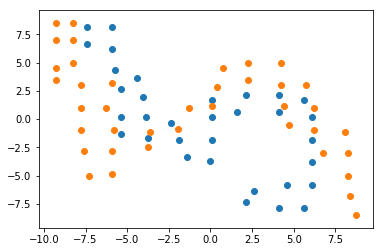

In [5]:
# Retourne le centroïde des points noirs d'une image en coordonnées (vertical, horizontal)
def get_center(x):
    dx, dy = x.shape[0], x.shape[1]
    vect = np.zeros((dx*dy, 2))
    k = 0
    result = np.zeros((2))
    var = 0
    for i in range(dy):
        for j in range(dx):
            if x[i, j] == 1:
                result += np.array([i, j])
                k += 1
    # On retourne le centroïde, ou (-1, -1) si l'image est vide
    return result / k if k > 0 else np.zeros(2) - 1


# Calcule la distance des centroïdes des différentes 
# sous-sections de l'image avec le centroïde de l'image totale, 
# le nombre de séparation doit être un diviseur de 28
def grid(x, n=2):
    ndim = 28
    img = x.reshape((28, 28))
    delta = ndim // n # Saut de coordonnées entre les sous-parties
    center = get_center(img) # Centre de l'image
    # Initialisation des centroïdes des sous-parties
    centroids = np.zeros((n, n, 2)) 
    for i in range(n):
        for j in range(n):
            i_square = i*delta # origine verticale du carré 
            j_square = j*delta # origine horizontale du carré
            # centroïde de l'image
            cent = get_center(img[i_square:(i+1)*delta, j_square:(j+1)*delta]) 
            
            # Cas où le carré est vide
            if cent[0] == -1:
                """on appplique une pénalité de -15 (hors de l'image) si le carré est vide.
                     Pour que la pénalité soit relative à la position du carré (afin que la 
                     pénalité soit consistante quand on calculera la distance entre deux image)
                     on applique la pénalité relativement à la position du carré"""
                centroids[i, j] = np.zeros((2)) - 15 * np.array([n - i, n - j])
            
            # Cas où le centroïde existe
            else:
                 
                centroids[i, j] = np.array([i_square, j_square]) + cent - center
    return centroids.reshape((n**2*2))
''' 
###########################################################################################
Cette version de l'algo donne des résultats assez bizarres avec ISOMAP. Nous avons
donc décidé de l'enlever pour l'instant, en espérant pouvoir comprendre les problématiques
d'ici la fin de la session ou dans le prochain devoir
##########################################################################################
    # Résultat des centroïdes transformés en un vecteur de n**2 données bidimensionelles
    a_centroids = centroids.reshape((n**2, 2))
    # Calcul des coordonées extrêmes
    max_v = np.max(np.abs(a_centroids[a_centroids[:,0] > -15, 0]))
    
    max_h = np.max(np.abs(a_centroids[a_centroids[:,1] > -15, 1]))
    max_v_ratio = 1.
    max_h_ratio = 1.
    #le centroïde doit être différent de (0, 0) pour appliquer un changement d'échelle
    if max_v > 0:
        max_v_ratio = 14 / max_v
        
    if max_h > 0:
        max_h_ratio = 14 / max_h
 
    a_centroids *= np.array([max_v_ratio, max_h_ratio])
    return a_centroids.reshape((n**2*2)) # On transforme en un vecteur    
''' 


# Applique grid à une liste de données
def to_grids(x, n_sub=2):
    
    n_data = x.shape[0]
    
    n_sub_dim = n_sub**2*2
    result = np.zeros((n_data, n_sub_dim))
    for i in range(n_data):
        result[i] = grid(x[i], n_sub) # les données sont transformer en vecteur
        
    return result



mnist_class = [mnist_train[mnist_train[:,0] == i, 1:] for i in range(10)]

#mnist_class_mean = np.array([np.mean(datas, axis=0) for datas in mnist_class])

# Test pour le chiffre 5
test1 = grid(mnist_class[5][10], 12)
test2 = grid(mnist_class[5][0], 12)

# On élimine les données hors de l'écran
test1 = test1[np.abs(test1) < 15]
test2 = test2[np.abs(test2) < 15 ]
 
plt.scatter(test1.reshape(test1.shape[0]//2, 2)[:, 0], test1.reshape(test1.shape[0]//2, 2)[:, 1])
plt.scatter(test2.reshape(test2.shape[0]//2, 2)[:, 0], test2.reshape(test2.shape[0]//2, 2)[:, 1])
plt.show()


On peut voir qu'on obtient une forme générale similaire pour les deux valeurs de 5

## Algorithmes

Pour commencer nous appliquons la transformation aux données. Dans ce cas là nous avons chosis un exemplaire de 6000 données d'entraînement. Le nombre de subdivisions est fixé à 14.

In [9]:
# Transformation des données MNIST (peut prendre un certain temps)

# Traitment en série de centroïde
# n_sub_div : Nombre de subdivisions de l'image (hyperparamètre)
def traitement_centro(n_sub_div, n_examples):
    n_sub_dim = n_sub_div**2*2  # Dimension du vecteur résultant en fonction du nombre de subdivisions 
    grid_train = to_grids(mnist_train[:n_examples, 1:], n_sub_div)

    grid_test = to_grids(mnist_test[:, 1:], n_sub_div)

    # Initialisation des nouveaux vecteurs de données
    mnist_train_mod = np.zeros((n_examples, n_sub_dim + 1))
    mnist_test_mod = np.zeros((n_test_data, n_sub_dim + 1))

    # On place les données
    mnist_train_mod[:, 1:] = grid_train

    mnist_test_mod[:, 1:] = grid_test

    # On place les labels dans la première entrée de chaque vecteur de donnée
    mnist_train_mod[:, 0] = mnist_train[:n_examples, 0]
    mnist_test_mod[:, 0] = mnist_test[:, 0]

    #print(mnist_train_mod[0])
    return mnist_train_mod, mnist_test_mod

In [ ]:
temp,z = traitement_centro(4,6000) # temp empêche l'impression inutile du résultat

# Comparaison des résultats

## K-médoïde

Voici une comparaison entre K-médoïde avec la distance euclidienne et et avec la distance définit plus haut. Pour comparer les résultats, les même médoïdes initiaux sont utilisés pour les deux algorithmes. Il sont choisit aléatoirement parmis les données. Pour représenter les dix chiffres, on a choisi un k = 10. On a vu en démo que le score silhouette donnait un résultat satisfaisant pour ce k.

Temps d'éxécution de l'algorithme k-medoid pour le cas de centroid: 0.7121398448944092
Temps d'éxécution de l'algorithme k-medoid pour le cas Euclidien: 1.08463716506958
Medoid intitaux: [2997 3768 1641  255  186 2272 1637 2592 1908  143]
Image des medoids obtenus par les donné des distance des centroid dans la base original


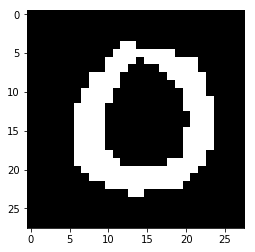

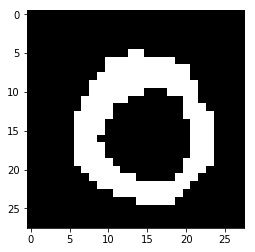

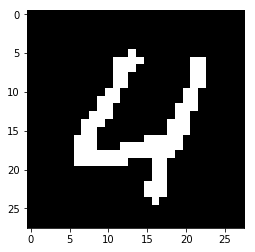

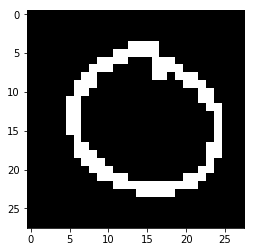

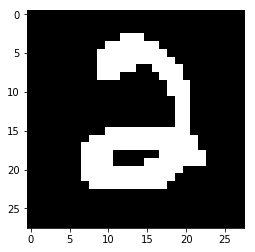

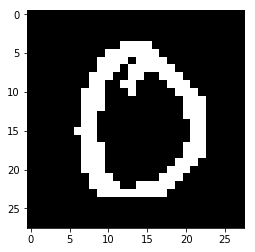

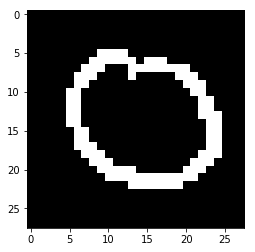

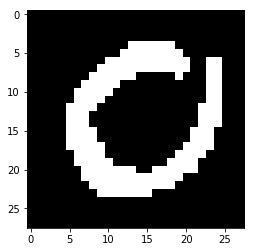

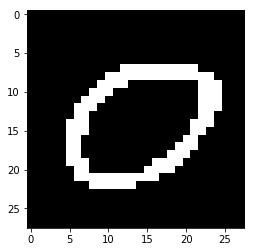

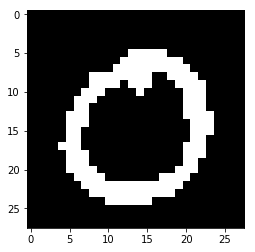

Image des medoids obtenue par la distance euclidienne entre le donnés


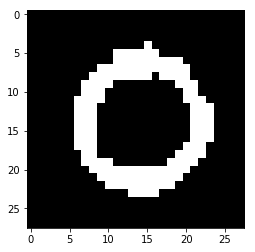

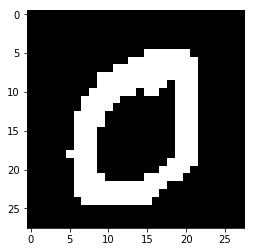

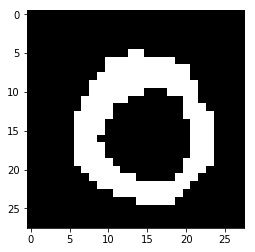

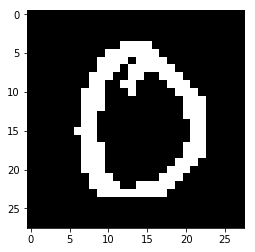

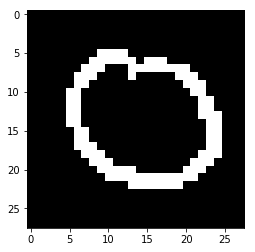

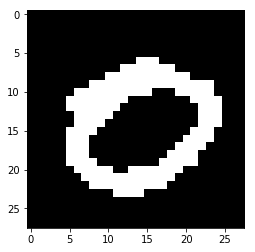

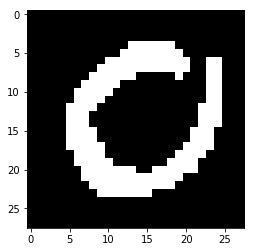

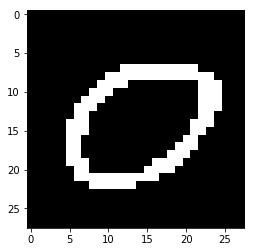

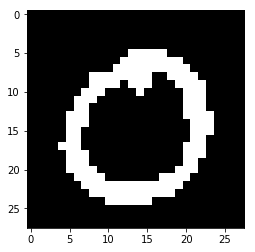

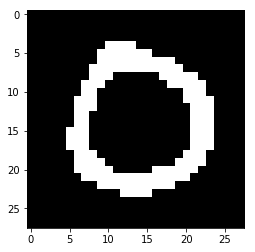

In [8]:
n_data = 4000 # nombre de données pour faire le test

# On retire les labels au données pour seulement garder les composantes
mnist_train_mod,z = traitement_centro(14,6000)

mnist_mod_data = mnist_train_mod[:n_data, 1:]
mnist_data = mnist_train[:n_data, 1:]

# Matrice de distance enre les données transformées
start = time.time()
d_mod = metrics.pairwise_distances(mnist_mod_data, mnist_mod_data)
end = time.time()
print("Temps d'éxécution de l'algorithme k-medoid pour le cas de centroïde: " + str(end - start))

#matrice de distance euclidienne
start = time.time()
d_euc = metrics.pairwise.euclidean_distances(mnist_data, mnist_data)
end = time.time()
print("Temps d'éxécution de l'algorithme k-medoid pour le cas Euclidien: " + str(end - start))


np.random.seed(2555)

# Initialise les médoïdes
initial_medoids = np.zeros((10), dtype="int32")
for i in range(10):
    n = np.random.randint(n_data)
    while n in initial_medoids:
        n = np.random.randint(n_data)
        
    initial_medoids[i] = n

print("Medoid intitaux: " + str(initial_medoids))



# Cas données transformées

k_mod = kmedoids(d_mod, initial_medoids, data_type='distance_matrix')

k_mod.process()

medoids = k_mod.get_clusters()[1]


print("Image des medoids obtenus par les donné des distance des centroid dans la base originale")
for cent in mnist_data[medoids[:10]] :    
    plt.figure()
    printImage(cent)

plt.show()
# cas eucliden
k_euc = kmedoids(d_euc, initial_medoids, data_type='distance_matrix')


k_euc.process()


medoids = k_euc.get_clusters()[1]


print("Image des médoïdes obtenue par la distance euclidienne entre le données")
for cent in mnist_data[medoids[:10]] :
    plt.figure()
    printImage(cent)

plt.show()
    

On observe qu'un des avantage de la distance de centroid est le temps de calcul. Si on regarde la distribution de quelque example de cluster, on peut observer que les chiffre semblent bien reconnus par notre algorithme même s'il fait des erreurs. 

#### Evaluation

On compare les scores silouhette de K-médoïde pour les deux distances.

In [9]:
""" Fonction qui transforme les données séparées en cluster 
    pour obtenir la liste des cluster associé a chaque donnée """

def prediction(clusters, datasize):
    predict = np.zeros((datasize), dtype="int32")
    for i in range(len(clusters)):
        predict[clusters[i]] = i
    return predict

predictions_mod = prediction(k_mod.get_clusters(), mnist_mod_data.shape[0])
#print(predictions_fft)
print("Score silhouette de la distance centroïde : " + str(metrics.silhouette_score(mnist_mod_data, predictions_mod)))

predictions_euc = prediction(k_euc.get_clusters(), mnist_data.shape[0])
print("Score silhouette de la distance centroïde : " + str(metrics.silhouette_score(mnist_data, predictions_euc)))

Score silhouette de la distance centroïde : 0.0542431836969
Score silhouette de la distance centroïde : 0.0428137093265


On voit que le score silhouette est légèrement supérieur pour la distance de centroïde

### Partition binaire
Maintenant on évalue les deux distance pour l'algorithme de partition binaire. On évalue aussi le score silouhette. 

In [10]:
#cas donné transformer
clustering_mod = AgglomerativeClustering(n_clusters=10, linkage="average").fit(mnist_mod_data)


# cas normal
clustering_euc = AgglomerativeClustering(n_clusters=10, linkage="average").fit(mnist_data)

#prediction
predictions_mod = clustering_mod.labels_
print("Score silhouette de la distance centroïde : " + str(metrics.silhouette_score(mnist_mod_data, predictions_mod)))


predictions_euc = clustering_euc.labels_
print("Score silhouette de la distance centroïde : " + str(metrics.silhouette_score(mnist_data, predictions_euc)))

centers = np.zeros((28))

Score silhouette de la distance centroïde : 0.0489985920995
Score silhouette de la distance centroïde : 0.0499208978292


Les regroupements ne semble pas donner d'avantages particuliers avec la nouvelle distance si on se fit au score silouhette. Encore une fois on observe l'avantage plutôt en efficacité.

## PCOA (MDS)

PcoA est une variance de MDs, alors nous avons préféré utiliser MDS. À première vue, quand on applique cet algorithme sur 2500 éléments du jeu de donnée MNIST avec une désimilarité euclédienne , le résultat obtenu est le suivant :

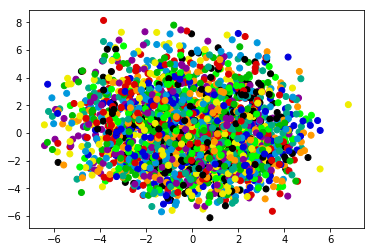

In [35]:
clf = MDS(n_components=12, n_init=1, max_iter=100, dissimilarity='euclidean', random_state=1)
X_mds = clf.fit_transform(mnist_train[:, 1:][:2500,:].astype(np.float64))

colors = [plt.cm.nipy_spectral(i/10., 1) for i in range(10)]

plt.scatter(X_mds[:, 0], X_mds[:, 1], c=colors)
 

Et si on applique le même algorithme sur les données de notre algorithme, les résultats sont :

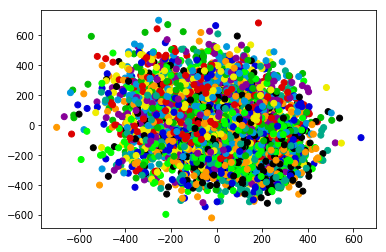

In [36]:
clf = MDS(n_components=12, n_init=1, max_iter=100, dissimilarity='euclidean', random_state=1)
X_mds = clf.fit_transform(mnist_train_mod[2500:,:])

colors = [plt.cm.nipy_spectral(i/10., 1) for i in range(10)]

plt.scatter(X_mds[:, 0], X_mds[:, 1], c=colors)
 

Dans le jeu de donnée original, on remarque que nos points se regroupent au centre et qu'il y en a peu qui s’éloignent du groupe. Dans notre algorithme, les points se regroupent aussi au centre mais occupent une plus grande surface du plan et il y en a beaucoup qui s’éloignent du groupe par rapport au jeu original. 

On remarque donc globalement peu de différence entre notre distance et la distance originale. On peut probablement attribuer cela au fait que notre algorithme ne modifie pas assez la notion de dissimilarité. Cela n'a donc pas une grande incidence  sur MDS.

## Isomap

La première étape avec Isomap était de trouver les bons hyperparamètres : le nombre de voisins et le nombre de components. L'augmentation de ces deux variables réduisaient notre erreur de reconstruction, mais ne donnait aucune différence tangible sur nos résultats.

Après avoir recherché en ligne, nous sommes tombés sur un article proposant de regarder le ratio des variances expliquées pour PCA. En regardant la courbe des variances, on observe qu’avec 80 composantes, on peut avoir 80% de la variance, mais qu’il faudra plus de 120 composantes pour avoir environ 95% de la variance.

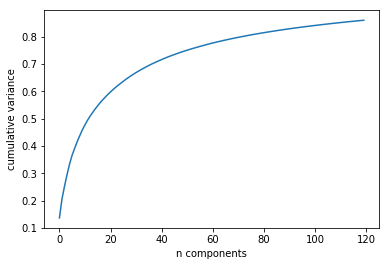

In [6]:
model = PCA(n_components=120,svd_solver='randomized').fit(mnist_train)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');
plt.show()

Toutefois, si on essaie de calculer l’erreur de reconstruction pour nb_composantes >= 53, on obtient une erreur avec la librairie, car les valeurs propres sont négatives. Après lecture de plusieurs articles, dont un portant sur l’optimisation des paramètres d’ISOMAP, on remarque que pour MNIST, les résultats optimaux obtenus sont de nombre_voisins = 9.6 et nombre_components = 6 ou 7 pour un erreur d’environ 1.5%. 

Considérant que notre algorithme est loin d'être aussi optimal que celui utilisé dans les recherches disponibles, nous avons été avec les recommendations du démonstrateur, soit un nombre de composantes à 2 et un nombre de voisins standards (i.e. 8).

Appliquons maintenant Isomap sur les données de MNIST

In [ ]:
# Calcul 'vanille' de isomap
isomap = Isomap(n_neighbors=8, n_components=2)
X_iso = isomap.fit(mnist_train).transform(mnist_train)
colors = [plt.cm.nipy_spectral(i/10., 1) for i in range(10)]

target_names = [0,1,2,3,4,5,6,7,8,9]

# Le tableau de booléen permet de gérer l'affichage de la légende
# Sans ça, chaque point était dans la légende et elle sortait du graphe
bool_label = [False,False,False,False,False,False,False,False,False,False]

## plot
plt.figure()
#for i in range(len(mnist_train[:, 0])): # Pour avoir toutes les données
for i in range(1000): # Nous ne prendrons que 1000 données, car sinon trop long
    for targ in target_names: # Pour chaque chiffre
        if (mnist_train[i, 0] == targ): # On vérifie si le label correspon au chiffre
            if (not(bool_label[targ])):
                # On crée le point dans le graphe
                 # Si c'est le premier représentant de sa catégorie, on l'ajoute à la légende
                plt.scatter(X_iso[i, 0], X_iso[i, 1], c=colors[targ], label = targ)
                bool_label[targ] = True
            else: 
                plt.scatter(X_iso[i, 0], X_iso[i, 1], c=colors[targ])
plt.legend()
plt.title('Isomap')
plt.show()

print(isomap.reconstruction_error())

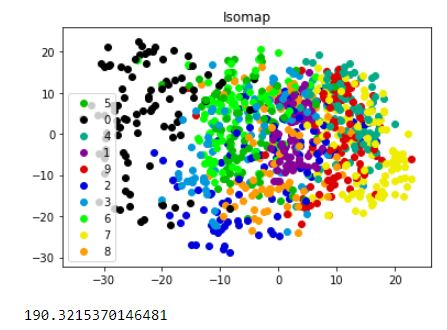

On peut remarquer que les données sont assez éparses et que les couleurs se chevauchent beaucoup. 
L'erreur de reconstruction est assez basse cependant.

Faisons le même exercice avec les données adaptées pour notre notion de distance.

In [ ]:
# Calcul de isomap avec notre notion de distance
# On envoie les mêmes paramètres que le calcul initial de isomap
def makeiso(mnist_train_mod, n_neighbors=8, n_components=2):
    isomap = Isomap(n_neighbors, n_components)
    X_iso = isomap.fit(mnist_train_mod).transform(mnist_train_mod)
    colors = [plt.cm.nipy_spectral(i/10., 1) for i in range(10)]

    target_names2 = [0,1,2,3,4,5,6,7,8,9]
    bool_label = [False,False,False,False,False,False,False,False,False,False]
    
    ## plot
    plt.figure()
    for i in range(len(mnist_train_mod[:, 0])):
        for targ in target_names2: 
            if (mnist_train_mod[i, 0] == targ):
                if (not(bool_label[targ])):
                    plt.scatter(X_iso[i, 0], X_iso[i, 1], c=colors[targ], label = targ)
                    bool_label[targ] = True
                else: 
                    plt.scatter(X_iso[i, 0], X_iso[i, 1], c=colors[targ])
    plt.legend()
    plt.title('Isomap')
    plt.show()

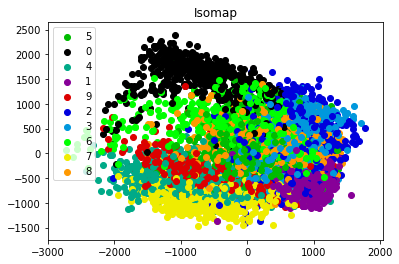

In [10]:
# On sépare l'image en 12, et on prend 6000 exemplaires
mnist_train_mod,z = traitement_centro(12,6000)

# Résultat avec 12 sous-images
makeiso(mnist_train_mod)

On observe une nette amélioration en terme de groupement des couleurs. Pour obtenir cela, il a fallu jouer avec l'hyperparamètre concernant le nombre de subdivision de l'image du chiffre. Les valeur 12 et 14 sont les plus intéressantes, car ils représentent le mieux les groupements entre les chiffres. 

La valeur 4, bien que très artistique, ne nous donnait vraiment pas le résultat attendu. 

Une valeur trop grande, au contraire, rendait les couleurs moins distinguables. Cela est fort probablement dû au fait que si on subdivise l'image en trop petits morceaux, les formes se perdent en des points moins significatifs (ex : une courbe devient une diagonale et est moins représentative puisqu'on perd le contexte des pixels autour)

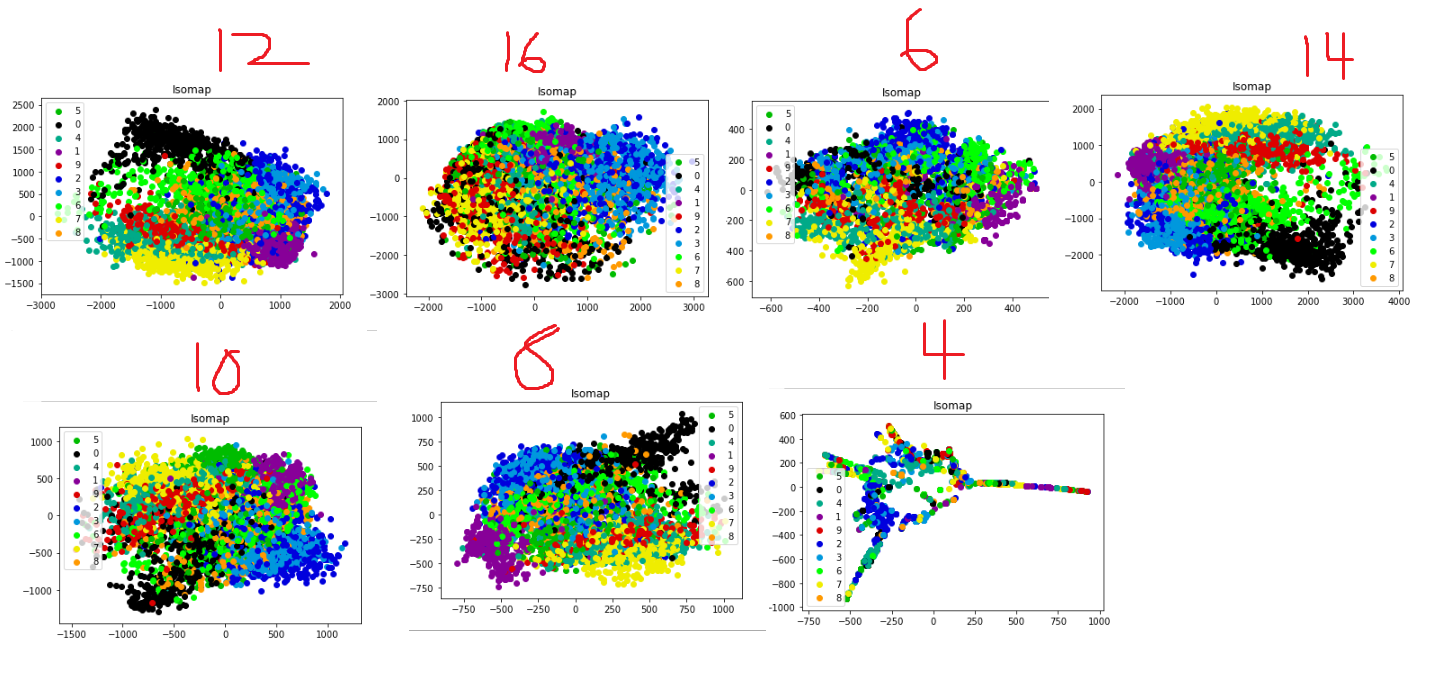

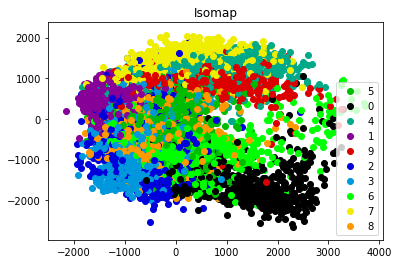

In [20]:
# Résultat avec 14 sous-images
mnist_train_mod,z = traitement_centro(14,6000)
makeiso(mnist_train_mod)

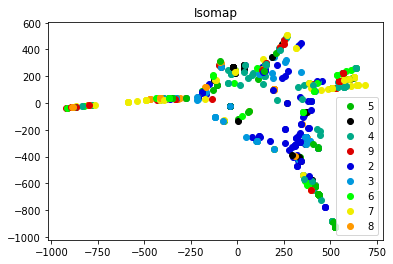

In [53]:
# Résultat avec 4 sous-images et 1000 données
mnist_train_mod,z = traitement_centro(4,1000)
makeiso(mnist_train_mod)

## KNN

In [10]:
# KNN simplifie avec sklearn


mnist_train_mod,mnist_test_mod = traitement_centro(12,6000)

#Groupe 1 teste les données de MNIST préalablement traitées
mnist_train1 = mnist_train_mod[:2000]
mnist_test1 = mnist_test_mod[:1000]

#Groupe 2 teste les données de MNIST sans traitement 
mnist_train2 = mnist_train[:2000]
mnist_test2 = mnist_test[:1000]

neigh = KNeighborsClassifier(n_neighbors=3)

#Résultats:
knn_notion_sim_originale = neigh.fit(mnist_train1[:, 1:], mnist_train1[:, 0])
print(knn_notion_sim_originale.score(mnist_test1[:, 1:], mnist_test1[:, 0]))

knn_ordinaire = neigh.fit(mnist_train2[:, 1:], mnist_train2[:, 0])
print(knn_ordinaire.score(mnist_test2[:, 1:], mnist_test2[:, 0]))

0.845
0.854


Pour l’analyse de cette partie, nous avons simplement utilisé la librairie ‘KNeighborsClassifier’ disponible via sklearn afin de faciliter l’utilisation de l’algorithme KNN. Dans un premier temps, nous avons créé deux groupes, le premier contient les données de MNIST préalablement traitées par la méthode du centroïde (discuté plus haut dans l’explication de notre notion de similarité originale) et le deuxième contient les données tirées de MNIST sans traitement particulier. Ensuite, nous avons calculé le taux de succès dans les deux cas. Ce taux fait une prédiction sur le résultat des données de test et le compare avec la vraie valeur indiquée par le label. Il est à préciser que nous avons utilisé nb_sub=12, c’est-à-dire que nous séparons les images originales en 12 sous-images à chaque fois (voir la partie explication sur notre notion de similarité).

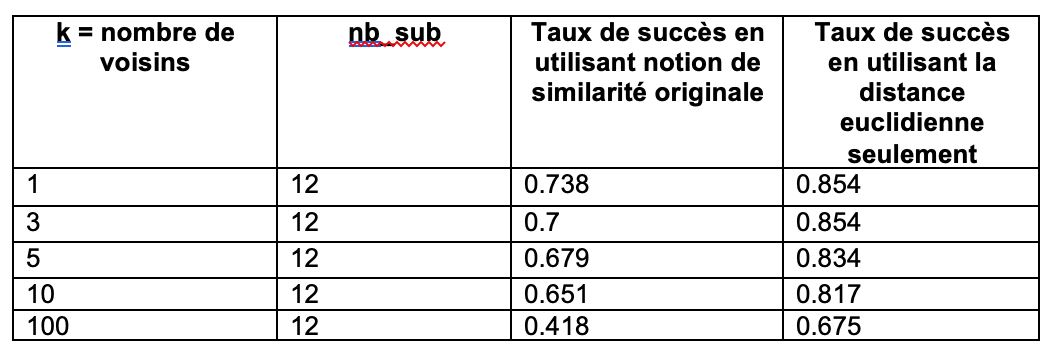

Il est permis de voir que la difficulté ici est de choisir le nombre k de voisins approprié afin d’avoir un meilleur taux de succès. Or, il est possible de voir que malgré la variation du nombre k de voisins, le taux de succès en utilisant la distance euclidienne standard est plus élevé que en utilisant notre notion de similarité. 

## Forces et faiblesses

### Données

Nous avons basé notre travail uniquement sur les données MNIST. Ainsi, notre algorithme prend pour acquis que les données sont biens centrées, avec le bon format et ayant subi une certaine normalisation. Si on prenait une photo d'un chiffre manuscrit et qu'on l'envoyait à l'algorithme, celui-ci serait probablement imprévisible. Une amélioration nécessaire serait de commencer par appliquer des transformations de normalisation pour que la photo soit sous un format gérable par notre algorithme.

De plus, nous n'avons en aucun cas vérifié ni géré le balancement des données. Normalement, il aurait fallut s'assurer d'avoir une quantité similaire de chaque chiffre et, au besoin, utiliser des techniques pour que ce nombre soit équivalent (ou le plus proche possible) pour tous les chiffres. 

### Traitement

Nous avons vu en classe que la cross validation permet d'éviter le surapprentissage. Nous aurions donc aimé pouvoir l'implémenter, mais le manque de temps et de connaissances nous a contraint à seulement implémenté un set train et un set test. Ce serait donc une amélioration intéressante à considérer dans le futur.

### Transformations

Malgré tout, notre algorithme répond bien à la translation. En séparant l'image en morceaux, on arrive à identifier les morceaux vides qui sont alors considérés comme du bruit. Ainsi, si l'image a subi une translation, on peut 'shrink' le blanc et recentrer l'image dans une version modifiée.

### Performance

Une fois les données traitées, nous appliquons une réduction de dimensionnalité, ce qui permet d'améliorer de beaucoup la performance globale obtenue.

### Librairies

L'utilisation des librairies a été ardue, car nous ne connaissions pas bien les forces de faiblesses des algorithmes présents. Ainsi, comprendre comment envoyer les bons paramètres et comment afficher un graphe intéressant pour les algorithmes de réduction de dimensionnalité s'est révélé être une tâche plus difficile que l'on pensait. De fait, les résultats obtenus ne sont probablement pas aussi poussés que l'on aurait espéré.

## Sitographie

### Consultation
- KNN : https://steven.codes/blog/ml/how-to-get-97-percent-on-MNIST-with-KNN/
- Distance Cosinus : https://towardsdatascience.com/building-improving-a-k-nearest-neighbors-algorithm-in-python-3b6b5320d2f8
- Distance tangente : http://yann.lecun.com/exdb/publis/pdf/simard-00.pdf
- Distance tangente : http://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-atelier-MINST-tangent-ditance.pdf
- Distance tangente : https://pdfs.semanticscholar.org/05c1/bee0b066351e40b096f569e2c06c98c2db38.pdf
- PCOA : http://colah.github.io/posts/2014-10-Visualizing-MNIST/
- ISOMAP : https://www.aaai.org/Papers/AAAI/2002/AAAI02-035.pdf
- ISOMAP : http://benalexkeen.com/isomap-for-dimensionality-reduction-in-python/
- ISOMAP : https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
- ISOMAP : http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html
- ISOMAP : http://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
- Descente de gradient : https://www.hindawi.com/journals/isrn/2012/834127/
- Descente de gradient : https://www.oreilly.com/learning/not-another-mnist-tutorial-with-tensorflow
- Cross validation : https://arxiv.org/pdf/1809.06846.pdf
- Pseudo metric : https://github.com/tensorpack/tensorpack/tree/master/examples/SimilarityLearning
- Normalisation : https://medium.com/@o.kroeger/tensorflow-mnist-and-your-own-handwritten-digits-4d1cd32bbab4

### Utilisation
- DB Mnist : http://yann.lecun.com/exdb/mnist/
- Apprentissage de notion de similarité : http://jmlr.csail.mit.edu/papers/volume10/weinberger09a/weinberger09a.pdf
- Concepts variés : http://individual.utoronto.ca/gauravjain/ECE462-HandwritingRecognition.pdf
- Idées pour extraction de features : https://pdfs.semanticscholar.org/d93f/5078717c38904aa24590079e4fa06a5d1639.pdf
- Isomap : https://www.researchgate.net/publication/223824802_Selection_of_the_optimal_parameter_value_for_the_Isomap_algorithm
- PCA prétraitement : https://towardsdatascience.com/dimensionality-reduction-does-pca-really-improve-classification-outcome-6e9ba21f0a32